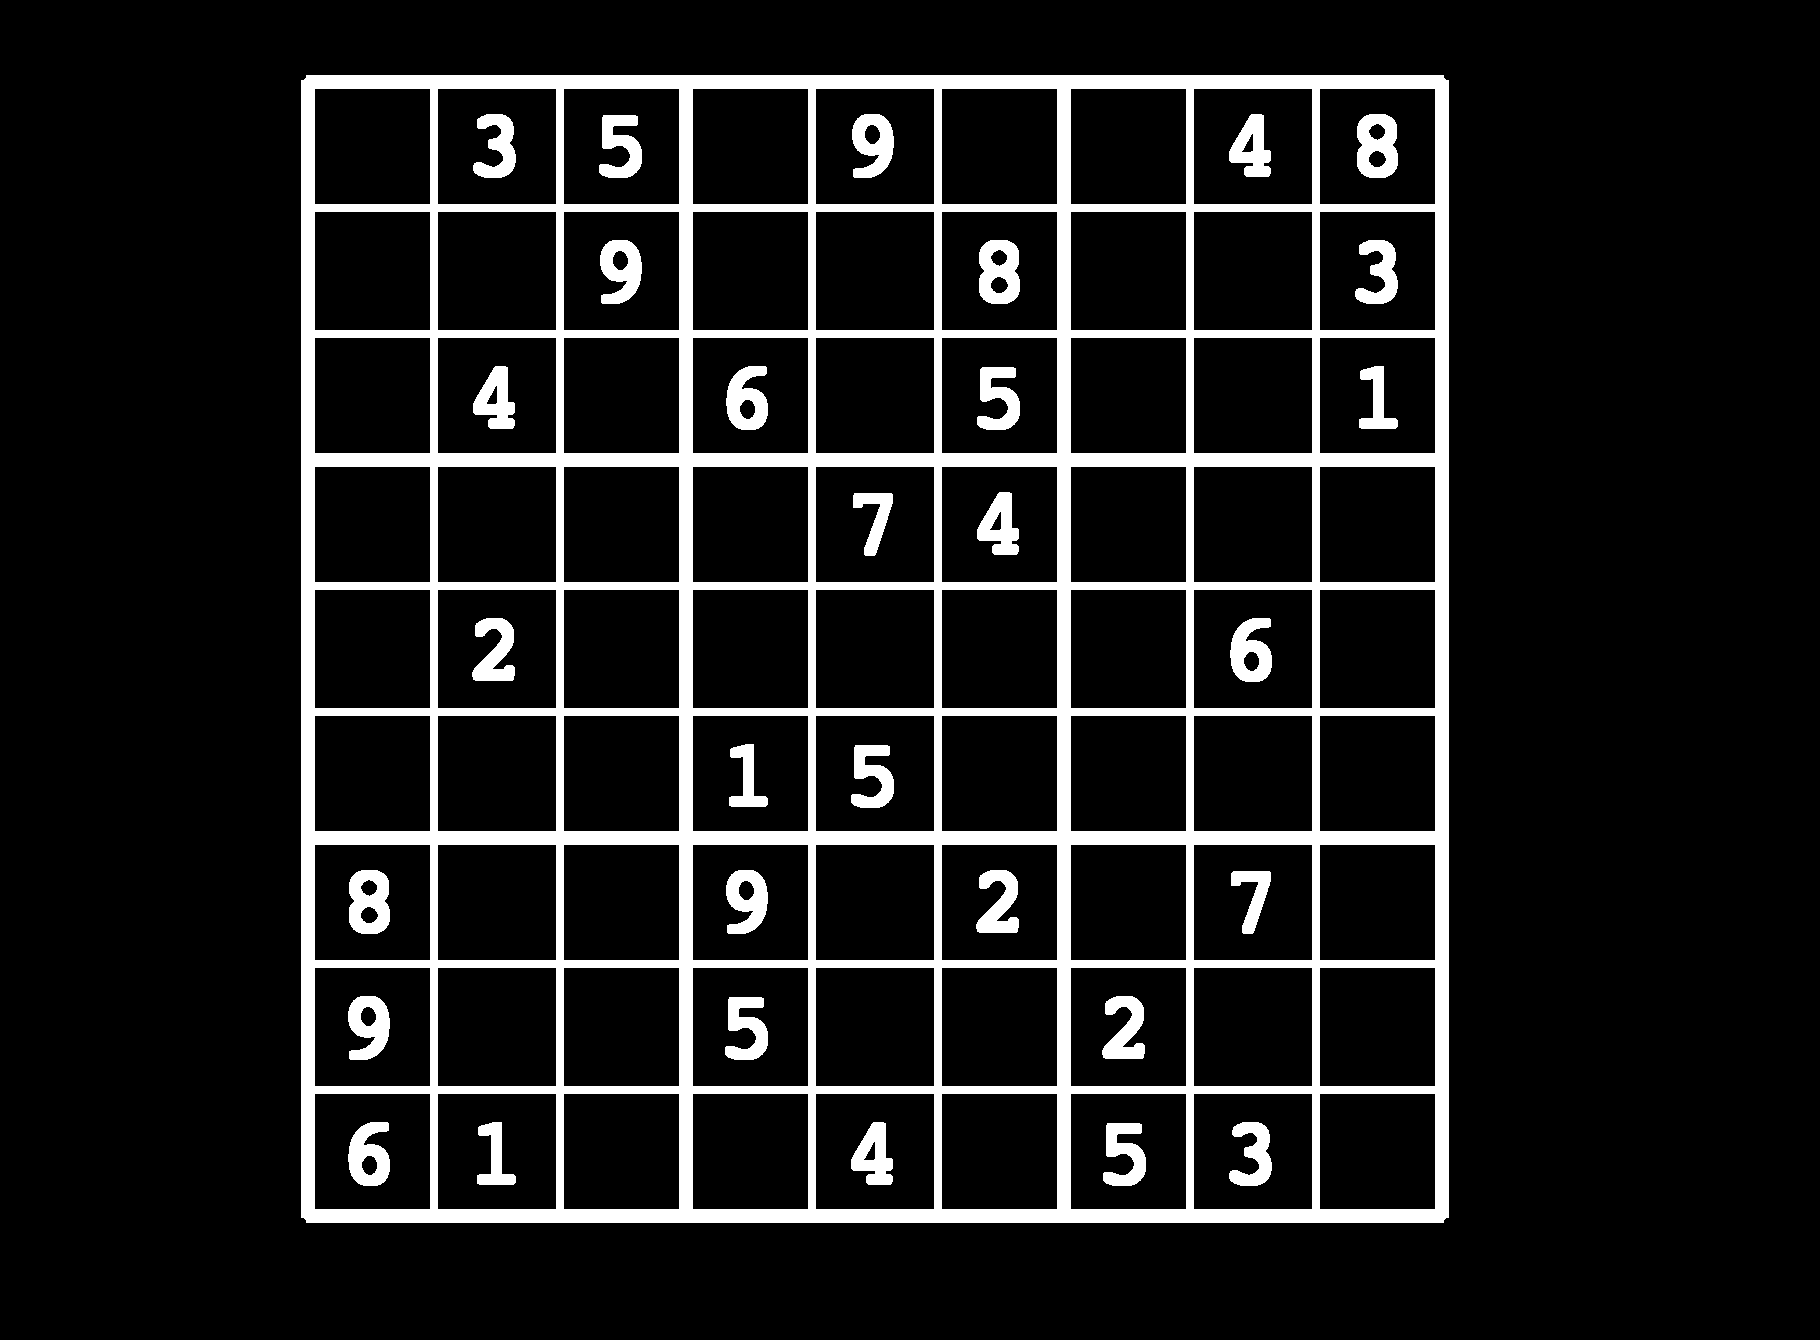

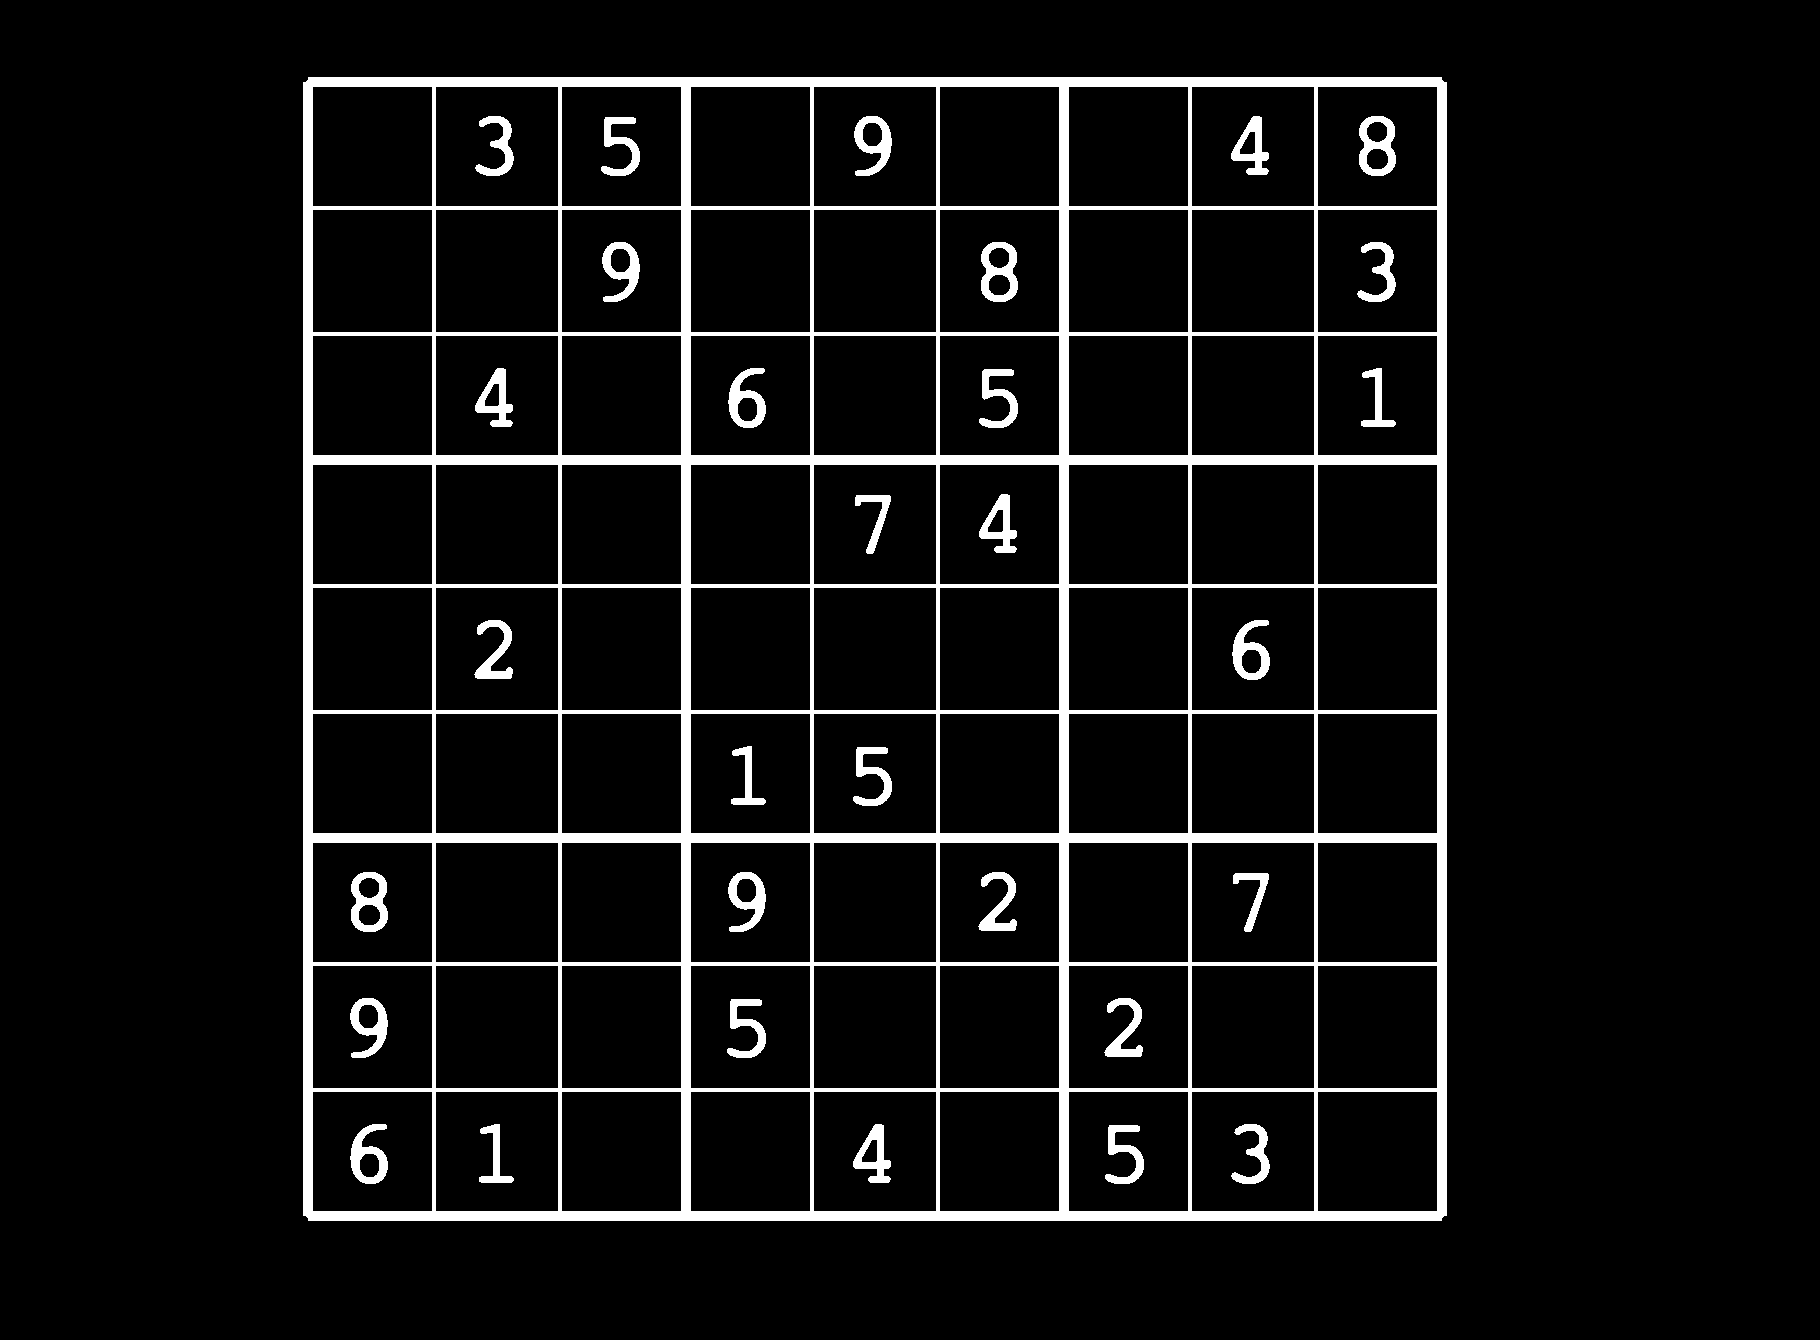

4564.970561981201
4


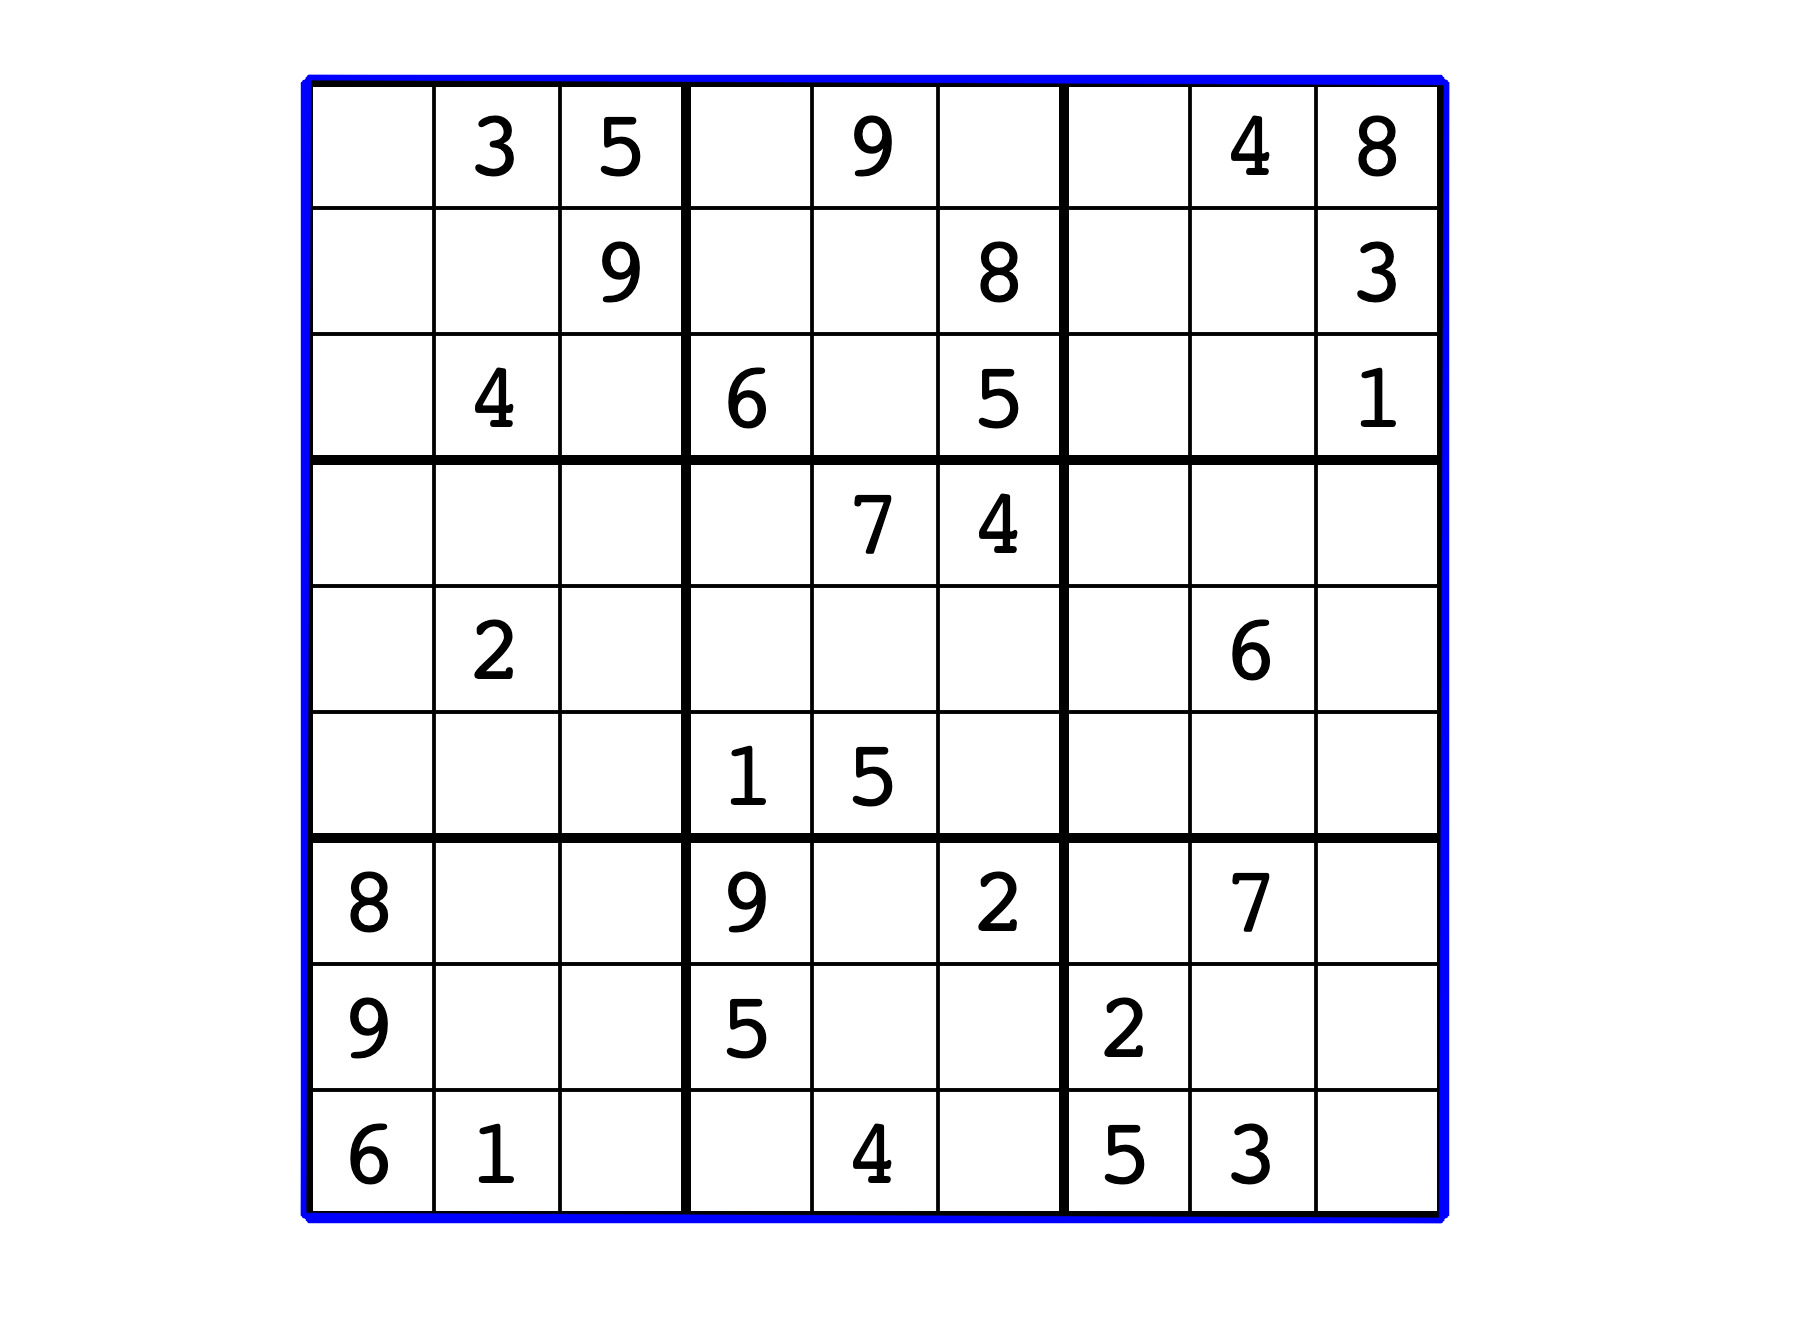

[[ 308.   77.]
 [ 303. 1215.]
 [1441. 1220.]
 [1446.   82.]]
[[  0.   0.]
 [  0. 500.]
 [500. 500.]
 [500.   0.]]


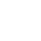

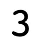

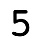

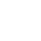

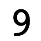

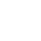

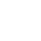

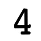

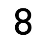

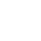

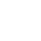

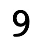

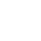

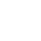

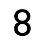

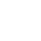

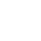

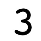

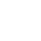

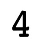

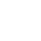

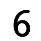

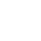

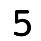

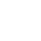

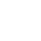

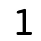

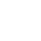

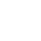

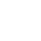

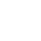

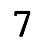

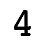

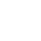

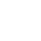

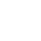

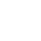

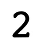

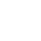

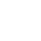

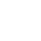

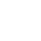

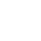

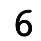

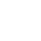

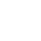

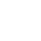

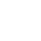

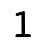

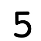

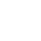

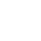

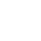

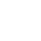

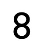

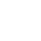

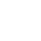

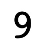

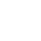

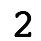

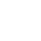

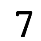

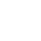

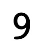

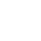

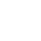

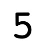

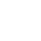

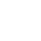

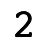

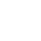

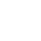

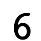

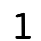

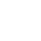

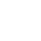

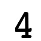

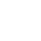

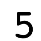

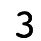

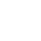

In [5]:
import struct
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image, display

def imshow(img):
    '''画像を Notebook 上にインラインで表示する。
    '''
    img = cv2.imencode('.png', img)[1]
    display(Image(img))

def split_image(img,x,y,line):
    height, width, channels = img.shape
    h = height//y
    w = width//x
    line_h = round(h*line)
    line_w = round(w*line)
    counter = 0
    for split_y in range(1, y+1):
        for split_x in range(1, x+1):
            counter += 1
            #7は枠を消すトリミング
            clp = img[ (h*(split_y-1))+line_h+7:(h*(split_y))-line_h-7, (w*(split_x-1))+line_w+7:(w*(split_x))-line_w-7]
            imshow(clp);
            cv2.imwrite("./raw_img/{}.png".format(counter), clp)
    counter = 0

image = cv2.imread("level_1.jpg")
# 画像をグレースケールにする
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 白黒反転
gray = cv2.bitwise_not(gray)
# Sobelフィルタ
dx = cv2.Sobel(gray, cv2.CV_8U, 1, 0)
dy = cv2.Sobel(gray, cv2.CV_8U, 0, 1)
sobel = np.sqrt(dx * dx + dy * dy)
sobel = (sobel * 128.0).astype('uint8')
_, sobel = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Canny法
canny = cv2.Canny(gray, 100, 200)
#２値化
ret,binary = cv2.threshold(gray,150,255,cv2.THRESH_BINARY)

res_dilate = cv2.dilate(binary, np.ones((5, 5), dtype=binary.dtype))
res_erode = cv2.erode(res_dilate, np.ones((5, 5), dtype=res_dilate.dtype))

imshow(res_dilate)
imshow(res_erode)


#res_close = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, np.ones((5, 5), dtype=binary.dtype))

_, contours, _ = cv2.findContours(res_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (255, 0, 0), 3, cv2.LINE_AA)

for cnt in contours:
    # 輪郭線の長さを計算
    arclen = cv2.arcLength(cnt, True)
    print(arclen)
    # 輪郭線の近似
    approx = cv2.approxPolyDP(cnt, 0.01 * arclen, True)
    # 何角形かを見てみる
    print(len(approx))
    # 輪郭線の描画
    cv2.drawContours(image, [approx], -1, (255, 0, 0), 3, cv2.LINE_AA)
    
    n_gon = len(approx)
    text = 'unknown'
    if n_gon > 10:
        text = 'circle'
    elif n_gon == 6:
        text = 'hexagon'
    elif n_gon == 5:
        text = 'pentagon'
    elif n_gon == 4:
        text = 'rectangle'
    elif n_gon == 3:
        text = 'triangle'
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    position = np.asarray(approx).reshape((-1, 2)).max(axis=0).astype('int32')
    px, py = position
    cv2.putText(image, text, (px + 10, py + 10), font, 1.0, (255, 255, 255), 2, cv2.LINE_AA)
    
    #print(approx)

imshow(image)

w, h = 500, 500  # 長方形の大きさ
points1 = approx.reshape(4,2);
points1 = np.float32(points1);
print(points1)
points2 = np.float32([[0, 0], [0, h], [w, h], [w, 0]])
print(points2)
H = cv2.getPerspectiveTransform(points1, points2)
square = cv2.warpPerspective(image, H, (w, h))


split_image(square,9,9,0)